In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
df_nm = pd.read_csv("..//dados/NeoMort_MA.csv")

# Dividir as classes
df_0 = df_nm[df_nm['VIVO'] == 0]
df_1 = df_nm[df_nm['VIVO'] == 1]

# Subamostrar a classe 1
df_1_under = df_1.sample(n=len(df_0), random_state=42)  # Ajuste o número conforme necessário

# Combinar as classes novamente
df_balanced = pd.concat([df_0, df_1_under])

df_balanced.head().T

,1066,1113,1193,1263,1508
Unnamed: 0,1100.0,1147.0,1231.0,1305.0,1561.0
CODMUNNASC,210043.0,210043.0,210043.0,210043.0,210043.0
LOCNASC,1.0,1.0,1.0,1.0,1.0
IDADEMAE,18.0,14.0,27.0,37.0,18.0
ESTCIVMAE,5.0,9.0,1.0,5.0,1.0
ESCMAE,3.0,3.0,4.0,4.0,3.0
QTDFILVIVO,0.0,0.0,4.0,4.0,0.0
QTDFILMORT,0.0,0.0,0.0,2.0,0.0
GESTACAO,4.0,4.0,5.0,5.0,2.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0


In [8]:
df_balanced_0 = df_balanced[df_balanced['VIVO'] == 0]
df_balanced_1 = df_balanced[df_balanced['VIVO'] == 1]

In [6]:
df_balanced['VIVO'].value_counts()

VIVO
0    1366
1    1366
Name: count, dtype: int64

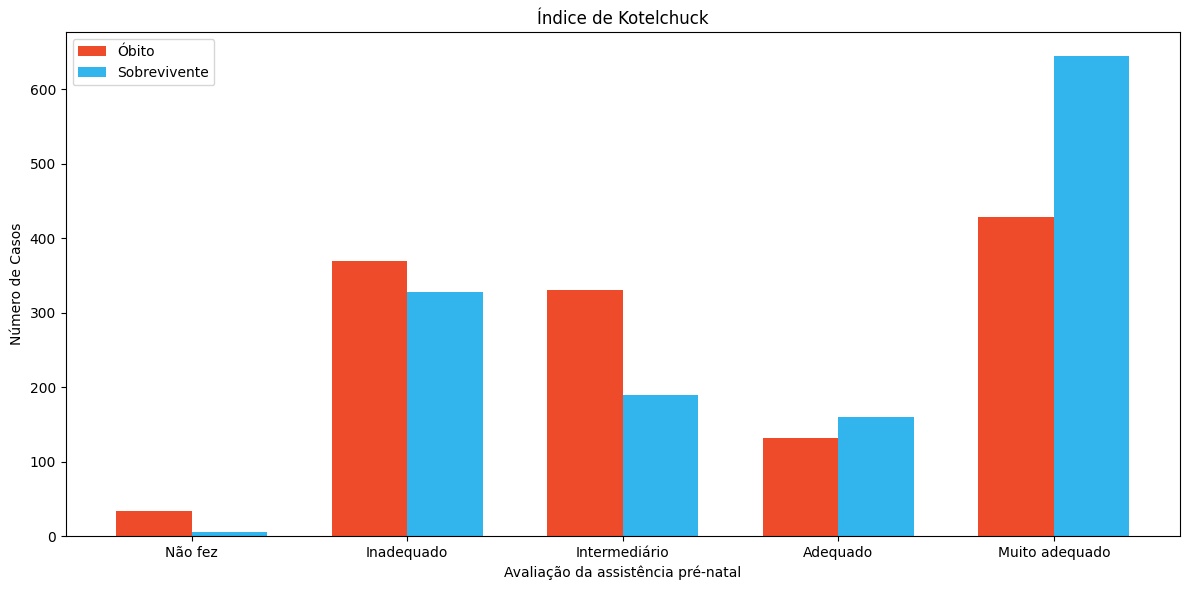

In [410]:
# Contando as ocorrências de KOTELCHUCK para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0[df_balanced_0['KOTELCHUCK'] != 9]['KOTELCHUCK'].value_counts().sort_index()
counts_vivo_1 = df_balanced_1[df_balanced_1['KOTELCHUCK'] != 9]['KOTELCHUCK'].value_counts().sort_index()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Não fez',
    2: 'Inadequado',
    3: 'Intermediário',
    4: 'Adequado',
    5: 'Muito adequado'
})

# Removendo o índice 9
counts = counts[counts.index != 9]

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Avaliação da assistência pré-natal')
plt.ylabel('Número de Casos')
plt.title('Índice de Kotelchuck')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

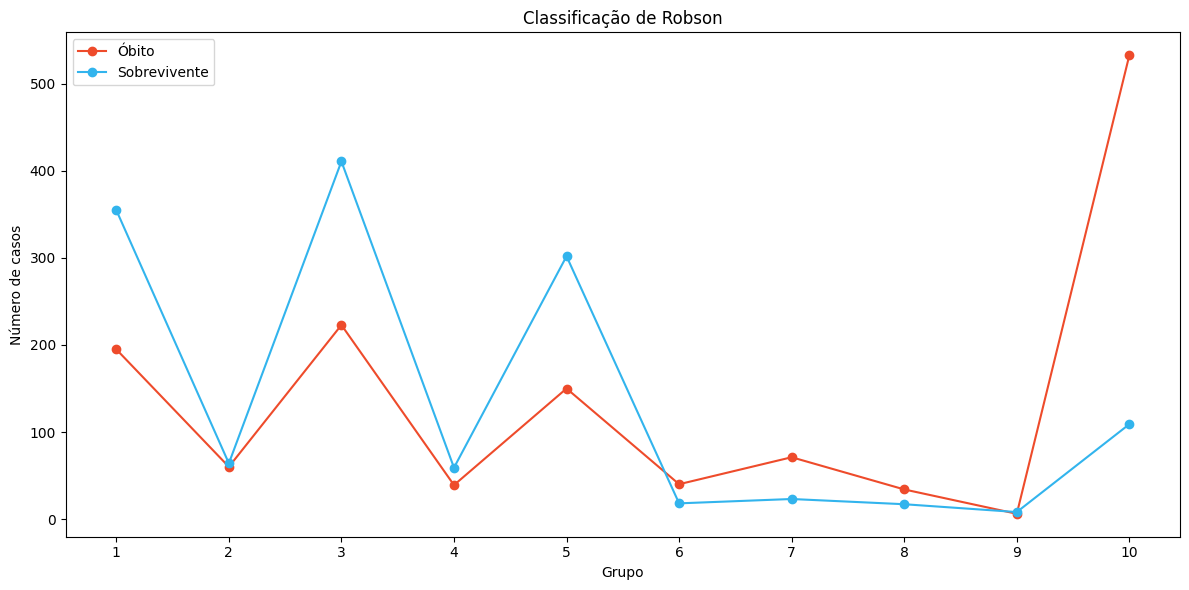

In [401]:
# Contando as ocorrências de TPROBSON para VIVO == 0 e VIVO == 1, ignorando o valor 11
counts_vivo_0 = df_balanced_0[df_balanced_0['TPROBSON'] != 11]['TPROBSON'].value_counts().sort_index()
counts_vivo_1 = df_balanced_1[df_balanced_1['TPROBSON'] != 11]['TPROBSON'].value_counts().sort_index()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando o gráfico
plt.figure(figsize=(12, 6))

# Criando as linhas para óbito e sobrevivente
plt.plot(counts.index, counts['Óbito'], marker='o', label='Óbito', color='#EE4B2B')
plt.plot(counts.index, counts['Sobrevivente'], marker='o', label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Grupo')
plt.ylabel('Número de casos')
plt.title('Classificação de Robson')
plt.xticks(counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

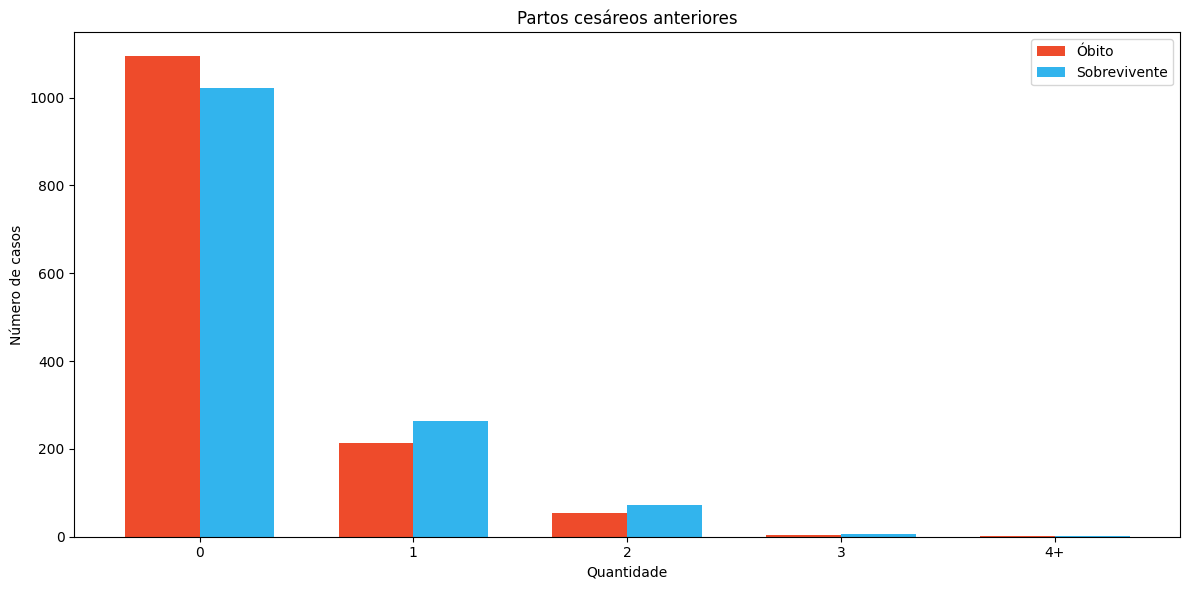

In [400]:
# Contando as ocorrências de QTDPARTCES para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['QTDPARTCES'].value_counts()
counts_vivo_1 = df_balanced_1['QTDPARTCES'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Agrupando partos a partir de 4 como "4+"
counts = counts.groupby(counts.index.map(lambda x: '4+' if x >= 4 else x)).sum()

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Número de casos')
plt.title('Partos cesáreos anteriores')

# Ajustando os rótulos do eixo X para inteiros e "4+"
xticks_labels = [str(int(i)) if i != '4+' else '4+' for i in counts.index]  # Converte para int, mantendo "4+"
plt.xticks([i + bar_width / 2 for i in x], xticks_labels)

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

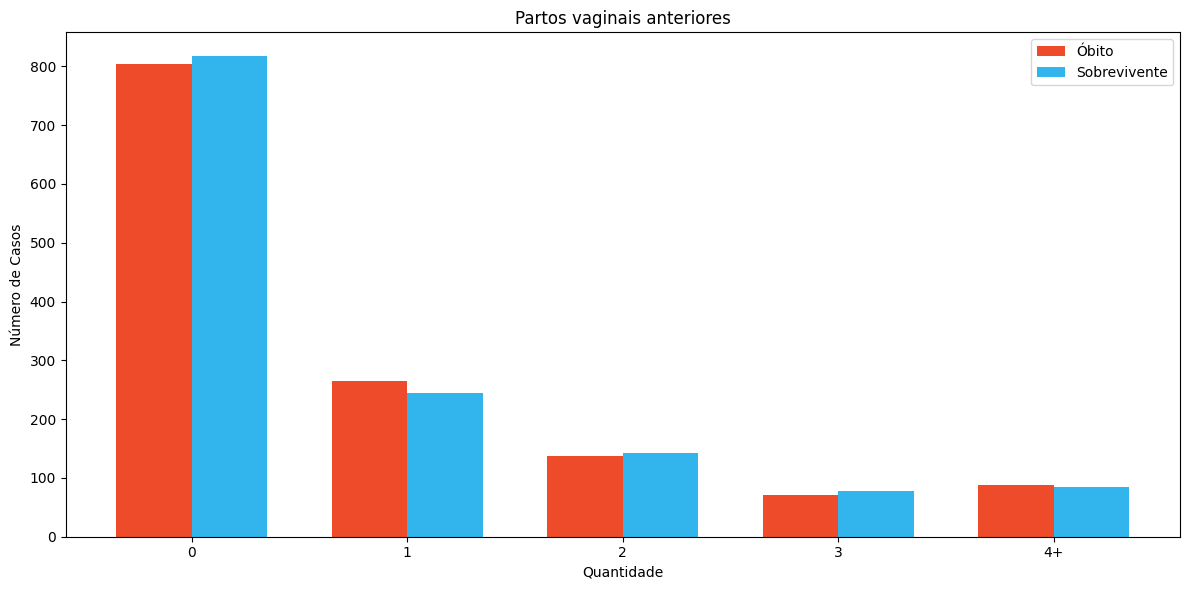

In [392]:
# Contando as ocorrências de QTDPARTNOR para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['QTDPARTNOR'].value_counts()
counts_vivo_1 = df_balanced_1['QTDPARTNOR'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Agrupando partos a partir de 4 como "4+"
counts = counts.groupby(counts.index.map(lambda x: '4+' if x >= 4 else x)).sum()

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Número de Casos')
plt.title('Partos vaginais anteriores')

# Ajustando os rótulos do eixo X para inteiros e "4+"
xticks_labels = [str(int(i)) if i != '4+' else '4+' for i in counts.index]  # Converte para int, mantendo "4+"
plt.xticks([i + bar_width / 2 for i in x], xticks_labels)

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

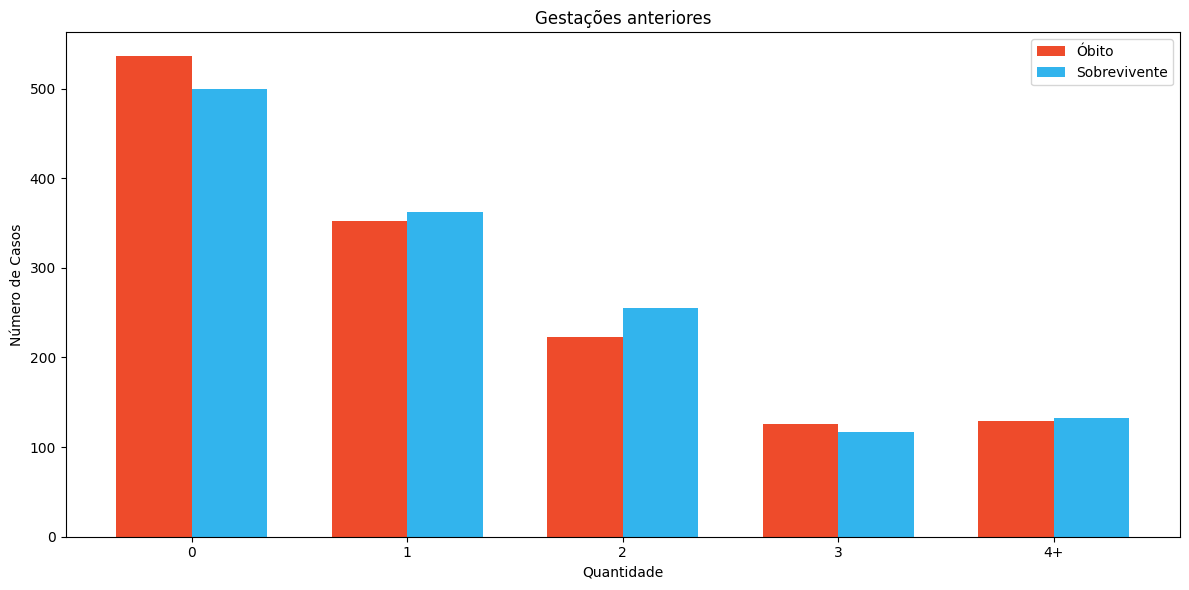

In [388]:
# Contando as ocorrências de QTDGESTANT para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['QTDGESTANT'].value_counts()
counts_vivo_1 = df_balanced_1['QTDGESTANT'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Agrupando gestações a partir de 4 como "4+"
counts = counts.groupby(counts.index.map(lambda x: '4+' if x >= 4 else x)).sum()

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Número de Casos')
plt.title('Gestações anteriores')

# Ajustando os rótulos do eixo X para inteiros e "4+"
xticks_labels = [str(int(i)) if i != '4+' else '4+' for i in counts.index]  # Converte para int, mantendo "4+"
plt.xticks([i + bar_width / 2 for i in x], xticks_labels)

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


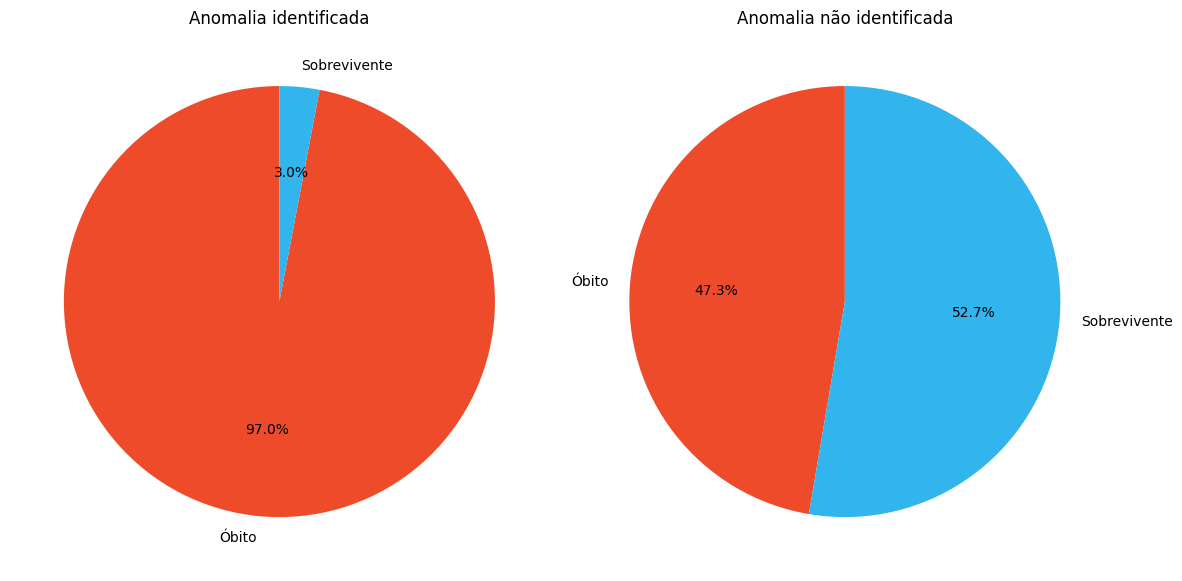

In [373]:
# Contando as ocorrências de IDANOMAL para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['IDANOMAL'].value_counts()
counts_vivo_1 = df_balanced_1['IDANOMAL'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9 (Ignorado)
counts = counts[counts.index != 9]

# Agrupando "Sim" e "Não"
counts = counts.groupby(counts.index.map({1: 'Sim', 2: 'Não'})).sum()

# Cores para os gráficos
colors = ['#EE4B2B', '#32b4ed']  # Cor para Óbito e Sobrevivente

# Criando os gráficos de pizza
plt.figure(figsize=(12, 6))

# Gráfico de pizza para anomalia identificada como "Sim"
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
plt.pie(counts.loc['Sim'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Anomalia identificada')

# Gráfico de pizza para anomalia identificada como "Não"
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
plt.pie(counts.loc['Não'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Anomalia não identificada')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

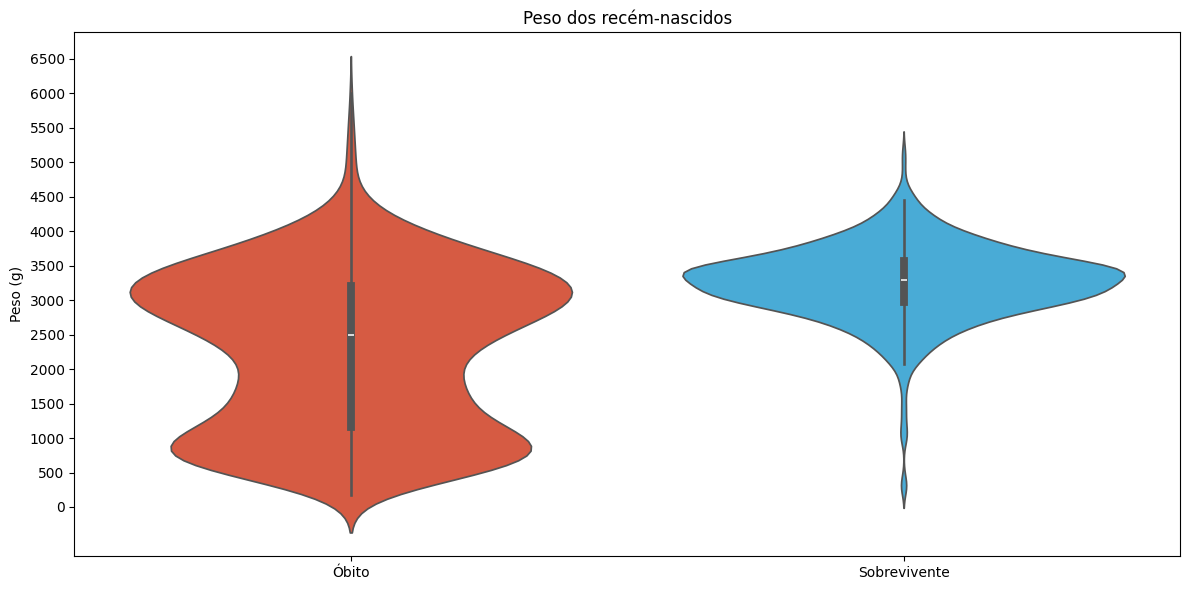

In [73]:
plt.figure(figsize=(12, 6))

# Box plot para Idade das Mães
sns.violinplot(data=df_balanced, x='VIVO', y='PESO', hue='VIVO', palette={0: '#EE4B2B', 1: '#32b4ed'}, dodge=False, legend=False)

# Adicionando rótulos e título
plt.xlabel('')
plt.ylabel('Peso (g)')
plt.title('Peso dos recém-nascidos')
plt.xticks(ticks=[0, 1], labels=['Óbito', 'Sobrevivente'])
plt.yticks(ticks=range(0, int(df_balanced['PESO'].max()) + 1000, 500))

# Exibir o gráfico
plt.tight_layout()
plt.show()

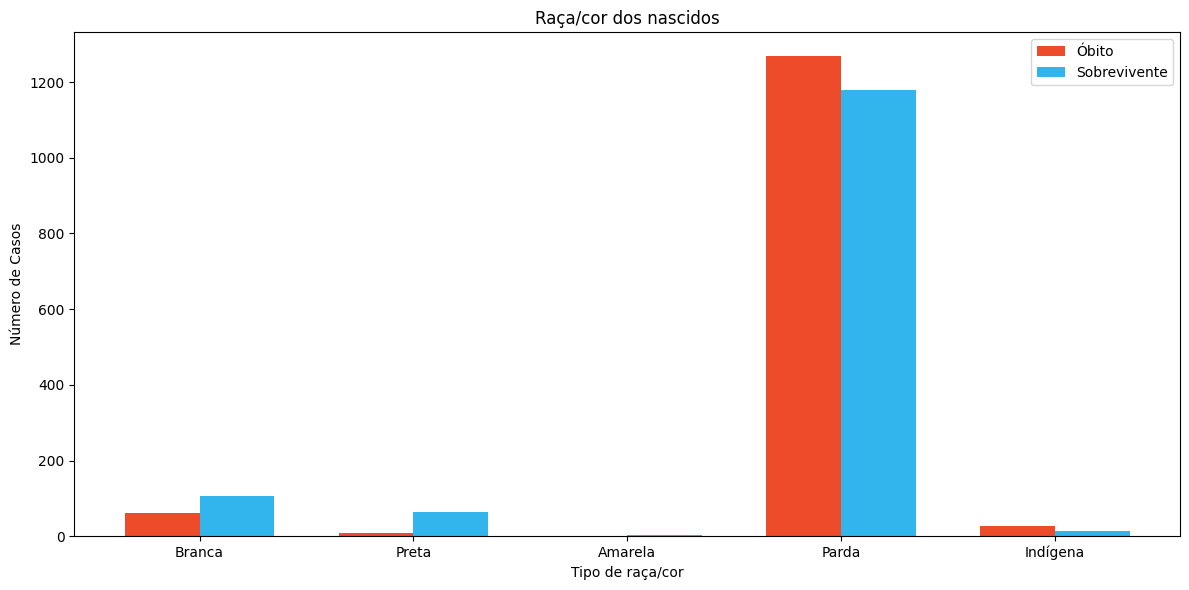

In [349]:
# Contando as ocorrências de RACACOR para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['RACACOR'].value_counts()
counts_vivo_1 = df_balanced_1['RACACOR'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena'
})

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Tipo de raça/cor')
plt.ylabel('Número de Casos')
plt.title('Raça/cor dos nascidos')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


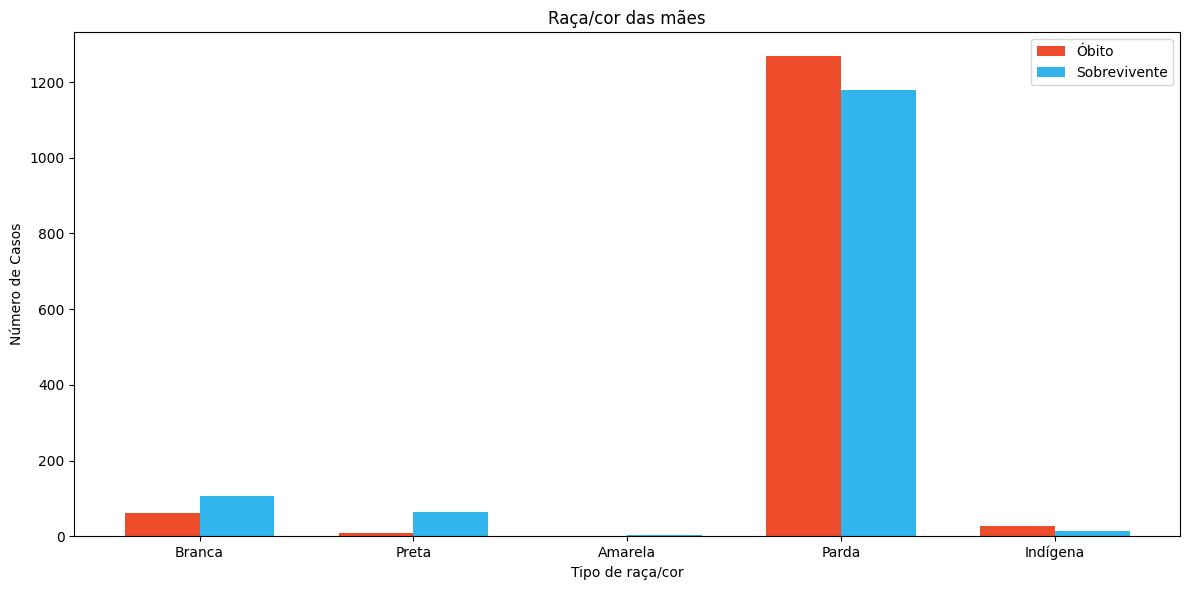

In [350]:
# Contando as ocorrências de RACACOR para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['RACACORMAE'].value_counts()
counts_vivo_1 = df_balanced_1['RACACORMAE'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena'
})

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Tipo de raça/cor')
plt.ylabel('Número de Casos')
plt.title('Raça/cor das mães')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


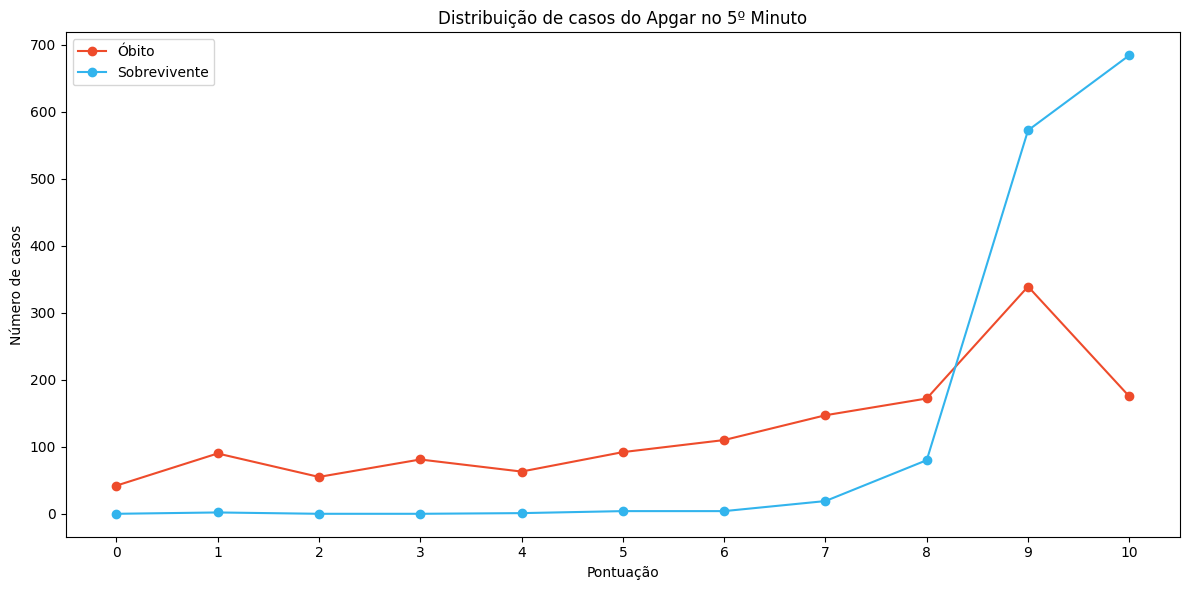

In [342]:
# Contando as ocorrências de APGAR5 para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['APGAR5'].value_counts().sort_index()
counts_vivo_1 = df_balanced_1['APGAR5'].value_counts().sort_index()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando o gráfico
plt.figure(figsize=(12, 6))

# Criando as linhas para óbito e sobrevivente
plt.plot(counts.index, counts['Óbito'], marker='o', label='Óbito', color='#EE4B2B')
plt.plot(counts.index, counts['Sobrevivente'], marker='o', label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Pontuação')
plt.ylabel('Número de casos')
plt.title('Distribuição de casos do Apgar no 5º Minuto')
plt.xticks(counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

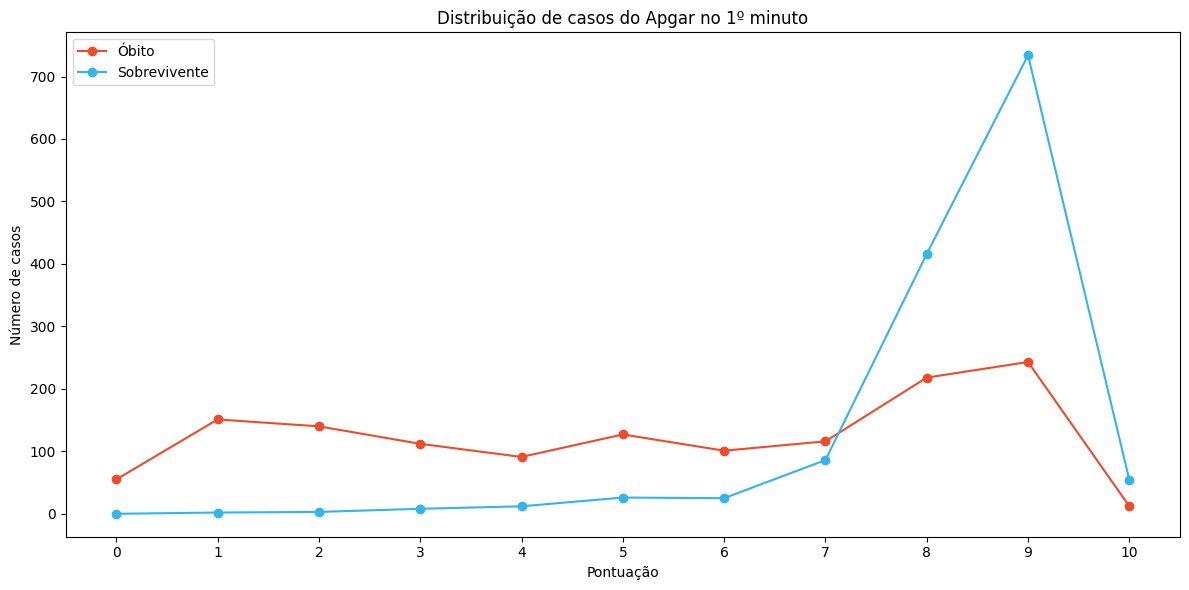

In [343]:
# Contando as ocorrências de APGAR1 para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['APGAR1'].value_counts().sort_index()
counts_vivo_1 = df_balanced_1['APGAR1'].value_counts().sort_index()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando o gráfico
plt.figure(figsize=(12, 6))

# Criando as linhas para óbito e sobrevivente
plt.plot(counts.index, counts['Óbito'], marker='o', label='Óbito', color='#EE4B2B')
plt.plot(counts.index, counts['Sobrevivente'], marker='o', label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Pontuação')
plt.ylabel('Número de casos')
plt.title('Distribuição de casos do Apgar no 1º minuto')
plt.xticks(counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


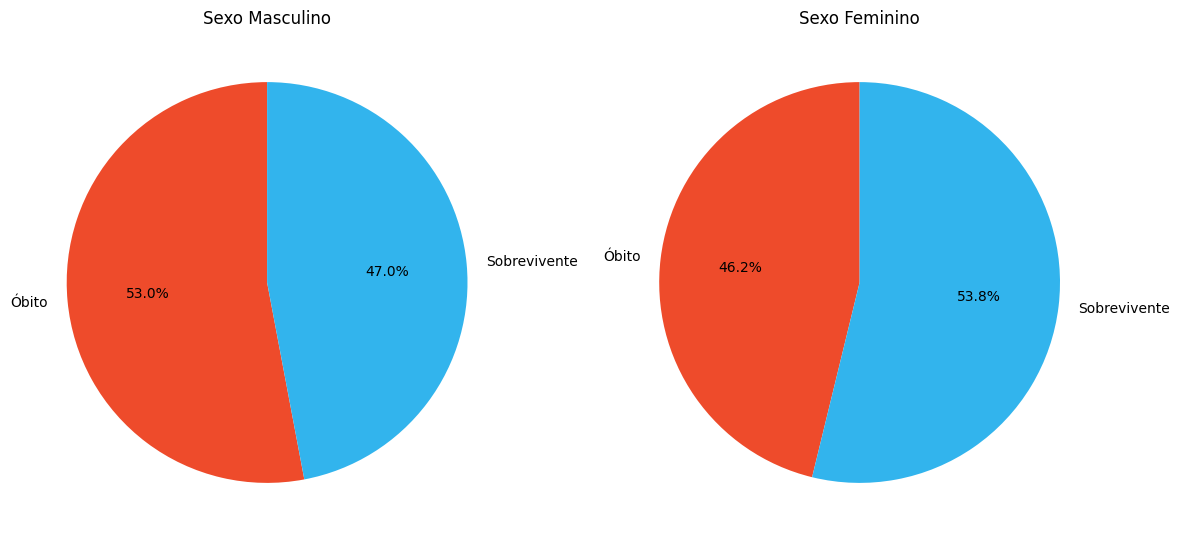

In [19]:
# Contando as ocorrências de SEXO para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['SEXO'].value_counts()
counts_vivo_1 = df_balanced_1['SEXO'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9 (Ignorado)
counts = counts[counts.index != 9]

# Agrupando "Masculino" e "Feminino"
counts = counts.groupby(counts.index.map({1: 'Masculino', 2: 'Feminino'})).sum()

# Cores para os gráficos
colors = ['#EE4B2B', '#32b4ed']  # Cor para Óbito e Sobrevivente

# Criando os gráficos de pizza
plt.figure(figsize=(12, 6))

# Gráfico de pizza para sexo masculino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
plt.pie(counts.loc['Masculino'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sexo Masculino')

# Gráfico de pizza para sexo feminino
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
plt.pie(counts.loc['Feminino'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sexo Feminino')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


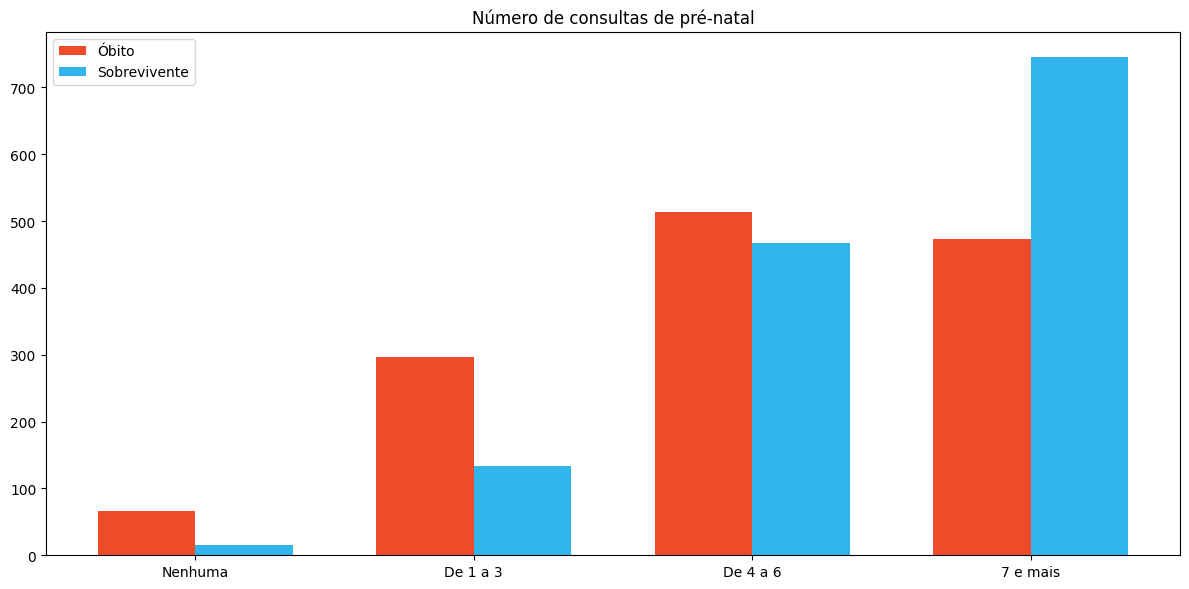

In [327]:
# Contando as ocorrências de CONSULTAS para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['CONSULTAS'].value_counts()
counts_vivo_1 = df_balanced_1['CONSULTAS'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9 (Ignorado)
counts = counts[counts.index != 9]

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Nenhuma',
    2: 'De 1 a 3',
    3: 'De 4 a 6',
    4: '7 e mais'
})

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('')
plt.ylabel('')
plt.title('Número de consultas de pré‐natal')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

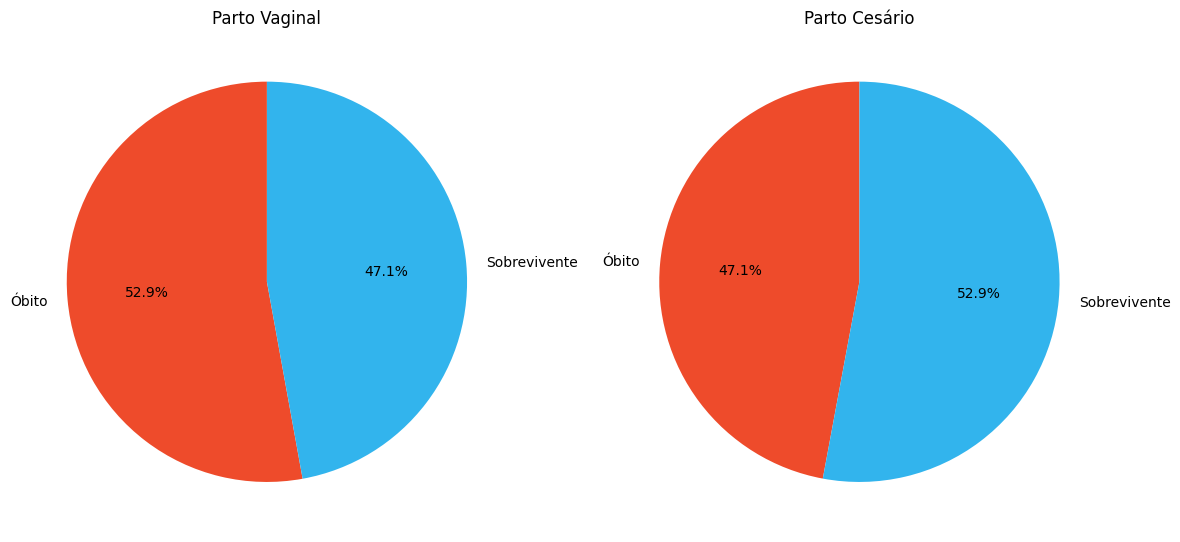

In [326]:
# Contando as ocorrências de PARTO para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['PARTO'].value_counts()
counts_vivo_1 = df_balanced_1['PARTO'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9 (Ignorado)
counts = counts[counts.index != 9]

# Agrupando "Vaginal" e "Cesário"
counts = counts.groupby(counts.index.map({1: 'Vaginal', 2: 'Cesário'})).sum()

# Cores para os gráficos
colors = ['#EE4B2B', '#32b4ed']  # Cor para Óbito e Sobrevivente

# Criando os gráficos de pizza
plt.figure(figsize=(12, 6))

# Gráfico de pizza para parto vaginal
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
plt.pie(counts.loc['Vaginal'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Parto Vaginal')

# Gráfico de pizza para parto cesário
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
plt.pie(counts.loc['Cesário'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Parto Cesário')

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


Text(0.5, 1.0, 'Gravidez Dupla ou Mais')

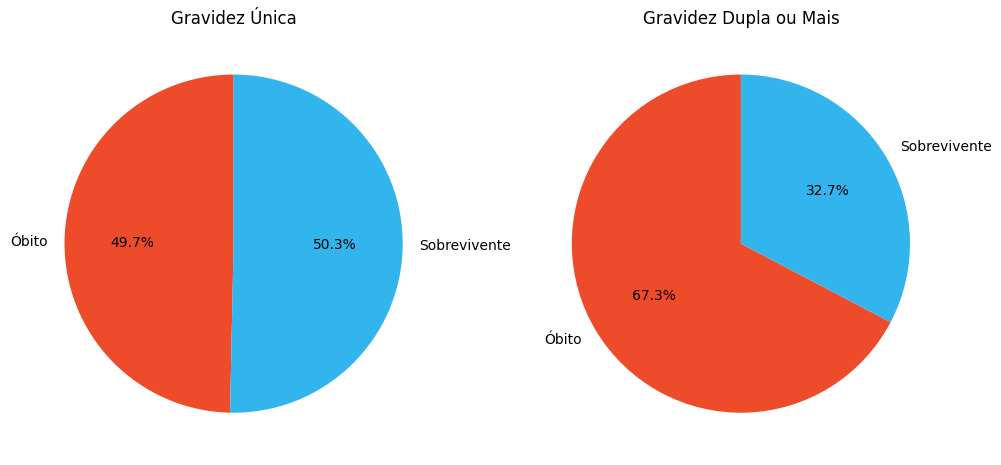

In [318]:
# Contando as ocorrências de GRAVIDEZ para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['GRAVIDEZ'].value_counts()
counts_vivo_1 = df_balanced_1['GRAVIDEZ'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9 (Ignorado)
counts = counts[counts.index != 9]

# Agrupando "Dupla" e "Tripla ou mais" juntos
counts = counts.groupby(counts.index.map({1: 'Única', 2: 'Dupla ou mais', 3: 'Dupla ou mais'})).sum()

# Cores para os gráficos
colors = ['#EE4B2B', '#32b4ed']  # Cor para Óbito e Sobrevivente

# Criando os gráficos de pizza
plt.figure(figsize=(12, 6))

# Gráfico de pizza para gravidez única
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
plt.pie(counts.loc['Única'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gravidez Única')

# Gráfico de pizza para dupla ou mais
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
plt.pie(counts.loc['Dupla ou mais'].values, labels=['Óbito', 'Sobrevivente'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gravidez Dupla ou Mais')

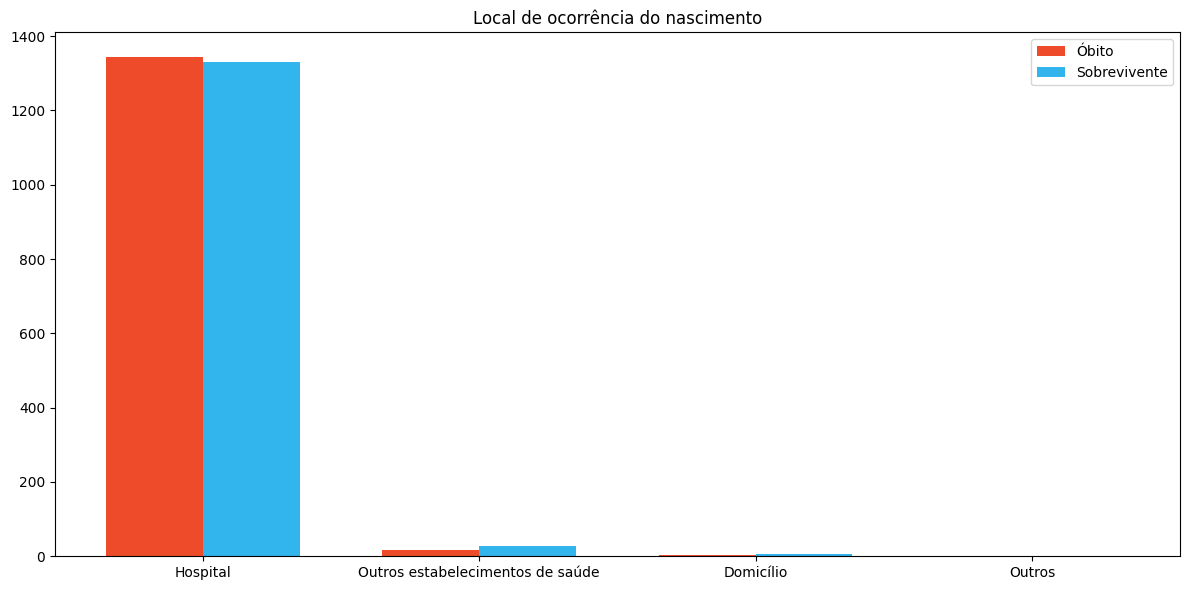

In [319]:
# Contando as ocorrências de LOCNASC para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['LOCNASC'].value_counts()
counts_vivo_1 = df_balanced_1['LOCNASC'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9
counts = counts[counts.index != 9]

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Hospital',
    2: 'Outros estabelecimentos de saúde',
    3: 'Domicílio',
    4: 'Outros'
})

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('')
plt.ylabel('')
plt.title('Local de ocorrência do nascimento')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

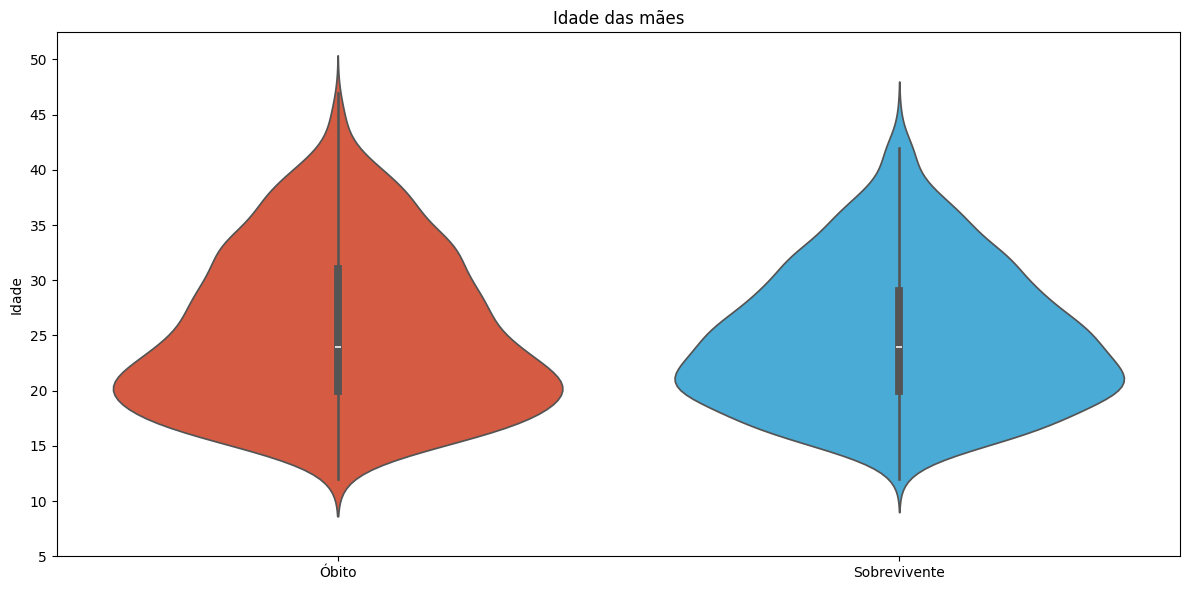

In [79]:
plt.figure(figsize=(12, 6))

# Box plot para Idade das Mães
sns.violinplot(data=df_balanced, x='VIVO', y='IDADEMAE', hue='VIVO', palette={0: '#EE4B2B', 1: '#32b4ed'}, dodge=False, legend=False)

# Adicionando rótulos e título
plt.xlabel('')
plt.ylabel('Idade')
plt.title('Idade das mães')
plt.xticks(ticks=[0, 1], labels=['Óbito', 'Sobrevivente'])
plt.yticks(ticks=range(5, int(df_balanced['IDADEMAE'].max()) + 5, 5))

# Exibir o gráfico
plt.tight_layout()
plt.show()

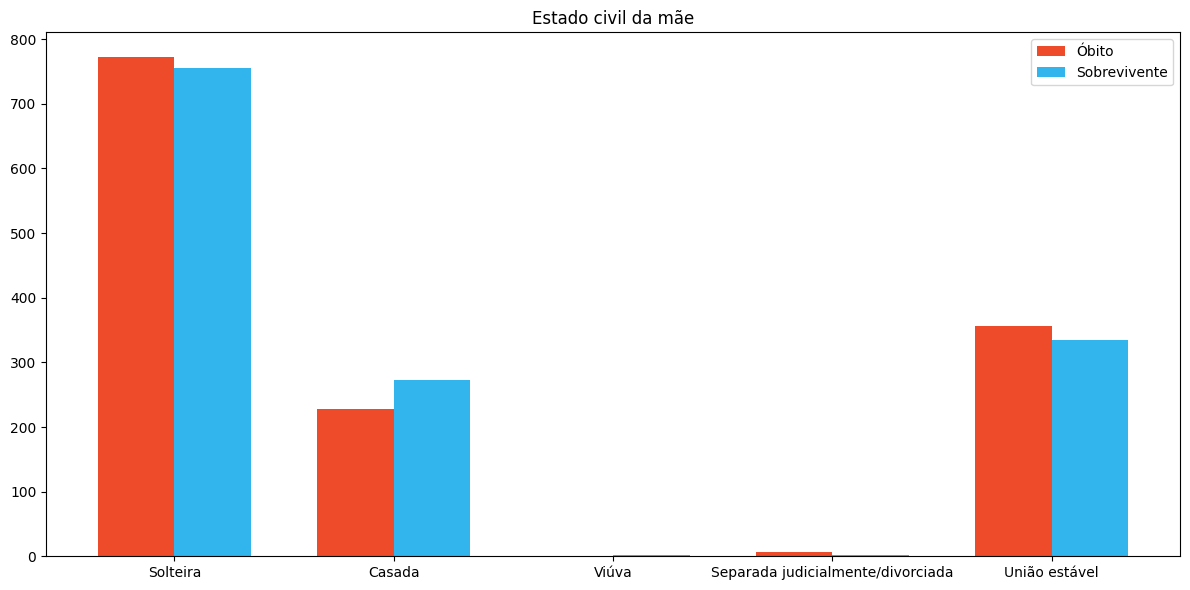

In [321]:
# Contando as ocorrências de ESTCIVMAE para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['ESTCIVMAE'].value_counts()
counts_vivo_1 = df_balanced_1['ESTCIVMAE'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9
counts = counts[counts.index != 9]

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Solteira',
    2: 'Casada',
    3: 'Viúva',
    4: 'Separada judicialmente/divorciada',
    5: 'União estável'
})

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('')
plt.ylabel('')
plt.title('Estado civil da mãe')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

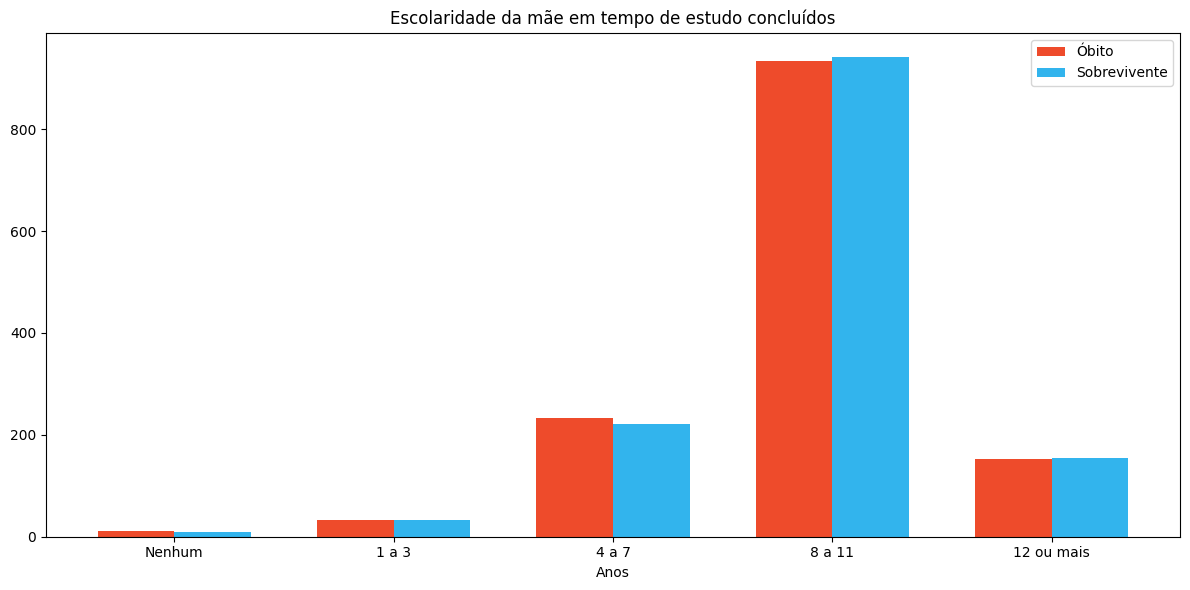

In [322]:
# Contando as ocorrências de ESCMAE para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced_0['ESCMAE'].value_counts()
counts_vivo_1 = df_balanced_1['ESCMAE'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9
counts = counts[counts.index != 9]

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: 'Nenhum',
    2: '1 a 3',
    3: '4 a 7',
    4: '8 a 11',
    5: '12 ou mais'
})

# Ordenando os índices na ordem correta
counts = counts.reindex(['Nenhum', '1 a 3', '4 a 7', '8 a 11', '12 ou mais'])

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Anos')
plt.ylabel('')
plt.title('Escolaridade da mãe em tempo de estudo concluídos')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

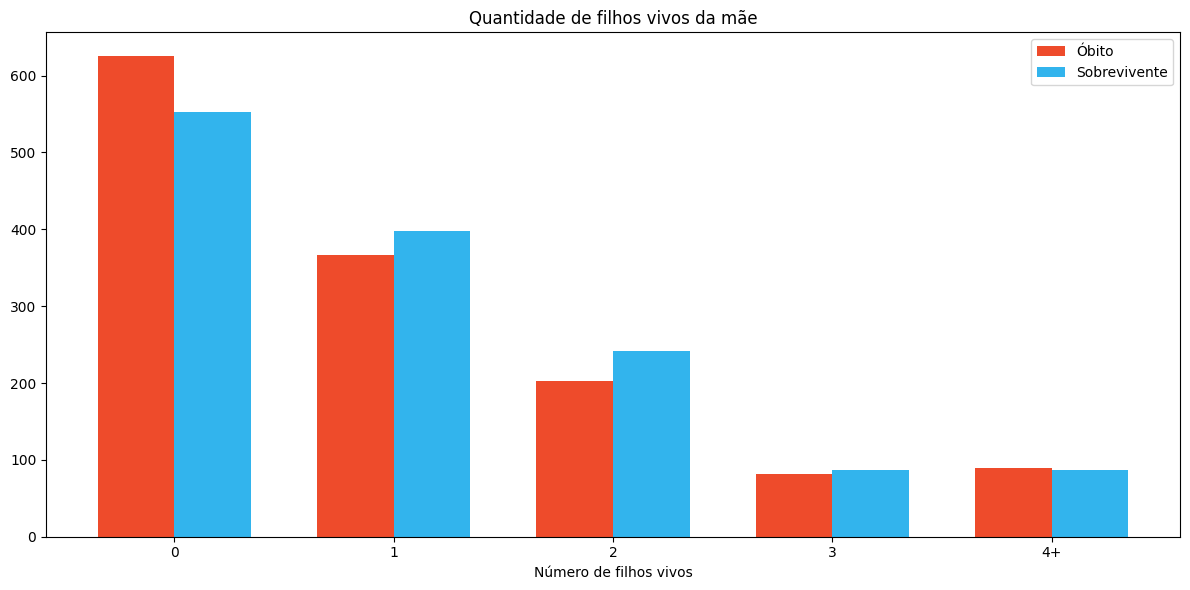

In [83]:
# Criando uma nova coluna para categorizar QTDFILVIVO
df_balanced['QTDFILVIVO_CAT'] = df_balanced['QTDFILVIVO'].apply(lambda x: '4+' if x >= 4 else str(int(x)))

# Contando as ocorrências de QTDFILVIVO_CAT para VIVO == 0 e VIVO == 1
counts_vivo_0 = df_balanced[df_balanced['VIVO'] == 0]['QTDFILVIVO_CAT'].value_counts().sort_index()
counts_vivo_1 = df_balanced[df_balanced['VIVO'] == 1]['QTDFILVIVO_CAT'].value_counts().sort_index()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_vivo_0,
    'Sobrevivente': counts_vivo_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Número de filhos vivos')
plt.ylabel('')
plt.title('Quantidade de filhos vivos da mãe')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


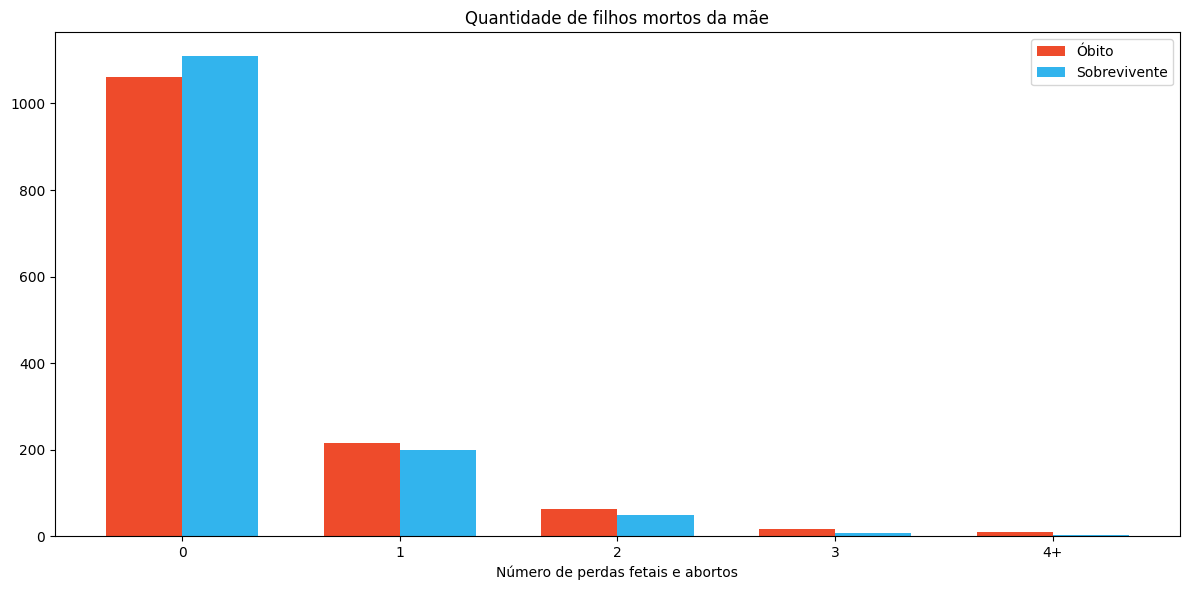

In [87]:
# Criando uma nova coluna para categorizar QTDFILMORT
df_balanced['QTDFILMORT_CAT'] = df_balanced['QTDFILMORT'].apply(lambda x: '4+' if x >= 4 else str(int(x)))

# Contando as ocorrências de QTDFILMORT_CAT para VIVO == 0 e VIVO == 1
counts_mort_0 = df_balanced[df_balanced['VIVO'] == 0]['QTDFILMORT_CAT'].value_counts().sort_index()
counts_mort_1 = df_balanced[df_balanced['VIVO'] == 1]['QTDFILMORT_CAT'].value_counts().sort_index()

# Unindo os dois contadores em um DataFrame
counts_mort = pd.DataFrame({
    'Óbito': counts_mort_0,
    'Sobrevivente': counts_mort_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts_mort))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts_mort['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts_mort['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Número de perdas fetais e abortos')
plt.ylabel('')
plt.title('Quantidade de filhos mortos da mãe')
plt.xticks([i + bar_width / 2 for i in x], counts_mort.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


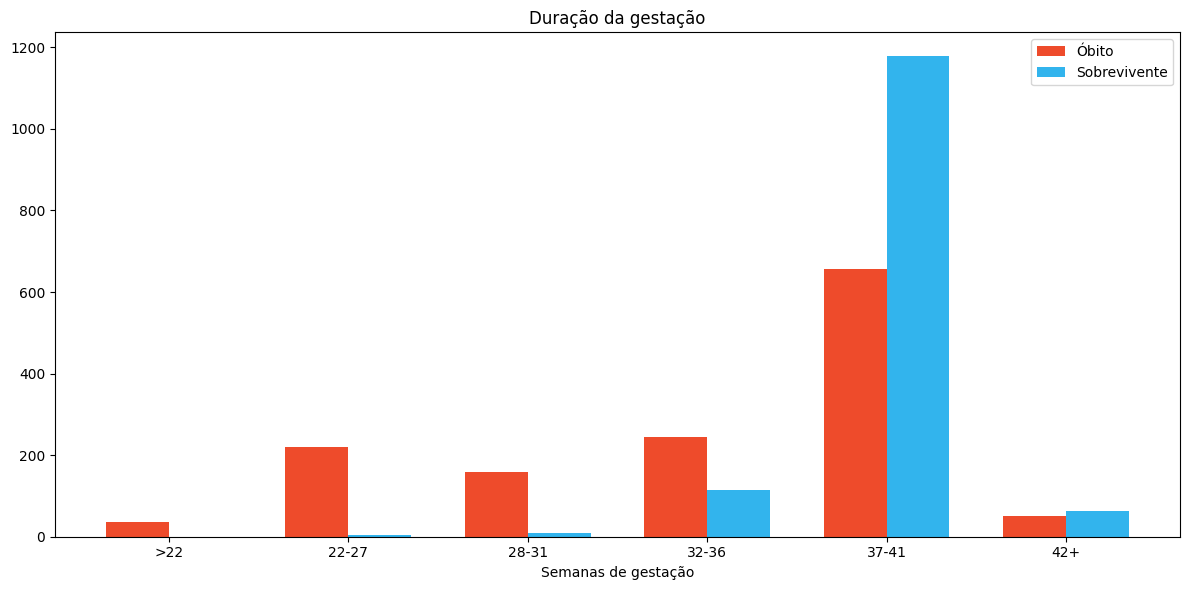

In [325]:
# Contando as ocorrências de GESTACAO para VIVO == 0 e VIVO == 1
counts_gestacao_0 = df_balanced_0['GESTACAO'].value_counts()
counts_gestacao_1 = df_balanced_1['GESTACAO'].value_counts()

# Unindo os dois contadores em um DataFrame
counts = pd.DataFrame({
    'Óbito': counts_gestacao_0,
    'Sobrevivente': counts_gestacao_1
}).fillna(0)  # Preencher com 0 para valores que não aparecem em uma das classes

# Filtrando para remover o índice 9 (Ignorado)
counts = counts[counts.index != 9]

# Configurando os nomes dos índices
counts.index = counts.index.map({
    1: '>22',
    2: '22-27',
    3: '28-31',
    4: '32-36',
    5: '37-41',
    6: '42+'
})

# Configurando o gráfico
bar_width = 0.35
x = range(len(counts))

plt.figure(figsize=(12, 6))

# Criando as barras
plt.bar(x, counts['Óbito'], width=bar_width, label='Óbito', color='#EE4B2B')
plt.bar([i + bar_width for i in x], counts['Sobrevivente'], width=bar_width, label='Sobrevivente', color='#32b4ed')

# Adicionando rótulos e título
plt.xlabel('Semanas de gestação')
plt.ylabel('')
plt.title('Duração da gestação')
plt.xticks([i + bar_width / 2 for i in x], counts.index)  # Ajustando os rótulos do eixo X

# Adicionando a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [97]:
df_balanced = df_balanced.drop(columns=['QTDFILVIVO_CAT','QTDFILMORT_CAT'])
df_balanced.to_csv('C:\\Users\\gabie\\OneDrive\\Área de Trabalho\\ebac\\projetos\\predicao_neonatal\\dados\\NeoMort_MA_nSMOTE.csv', index=False)

In [99]:
df_nS = pd.read_csv("..//dados/NeoMort_MA_nSMOTE.csv")
df_nS.head().T

,0,1,2,3,4
Unnamed: 0,1100.0,1147.0,1231.0,1305.0,1561.0
CODMUNNASC,210043.0,210043.0,210043.0,210043.0,210043.0
LOCNASC,1.0,1.0,1.0,1.0,1.0
IDADEMAE,18.0,14.0,27.0,37.0,18.0
ESTCIVMAE,5.0,9.0,1.0,5.0,1.0
ESCMAE,3.0,3.0,4.0,4.0,3.0
QTDFILVIVO,0.0,0.0,4.0,4.0,0.0
QTDFILMORT,0.0,0.0,0.0,2.0,0.0
GESTACAO,4.0,4.0,5.0,5.0,2.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0


In [101]:
len(df_nS)

2732